### KNN 실습

### 1. 데이터, 모듈 불러오기 및 kNN 피팅 방법

- 함수 불러오기

In [11]:
from sklearn import neighbors, datasets

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import confusion_matrix

In [13]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

- 모델 구축

In [14]:
knn = neighbors.KNeighborsClassifier(5)
knn.fit(X,y)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(X)

In [17]:
confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]], dtype=int64)

### 2. Cross-validation을 활용한 최적의 k 찾기

- 함수 불러오기

In [21]:
from sklearn.model_selection import cross_val_score

- CV 진행

In [23]:
k_range = range(1,100)
k_scores = []

# 최적의 k를 찾는 과정
for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

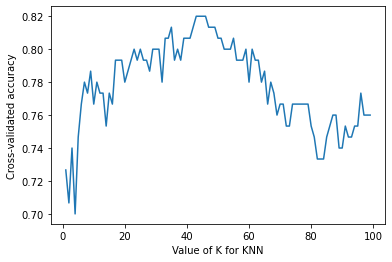

In [26]:
# accuracy가 높게 나오는 k값을 찾음

plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-validated accuracy")
plt.show()

### 3. Weight를 준 kNN

In [33]:
np.random.seed(0)
n_neighbors = 40
X = np.sort(5 * np.random.rand(40,1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

In [38]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_= knn.fit(X,y).predict(T)

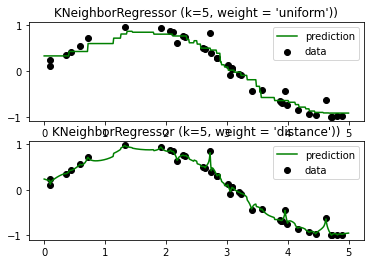

In [43]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X,y).predict(T)
    
    plt.subplot(2,1, i+1)
    plt.scatter(X,y, c='k', label = 'data')
    plt.plot(T, y_, c='g', label = 'prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborRegressor (k=%i, weight = '%s'))" % (n_neighbors, weights))